In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.iloc[:, 0:2]
y = df.iloc[:,-1]

In [5]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [7]:
# from sklearn.model_selection import train_test_split
 
# X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [8]:
#X_train.shape

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

C:\Users\munna\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [10]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\munna\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y, epochs=100, batch_size=1, validation_split=0.2)
print(time.time() - start)

Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7719 - loss: 0.5441 - val_accuracy: 0.7250 - val_loss: 0.5825
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8625 - loss: 0.3659 - val_accuracy: 0.7500 - val_loss: 0.5171
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8562 - loss: 0.3066 - val_accuracy: 0.7625 - val_loss: 0.4315
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8687 - loss: 0.2896 - val_accuracy: 0.8250 - val_loss: 0.3638
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.2905 - val_accuracy: 0.9125 - val_loss: 0.3167
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8719 - loss: 0.2821 - val_accuracy: 0.9250 - val_loss: 0.2870
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8719 - loss: 0.2797 - val_accuracy: 0.9625 - val_loss: 0.2659
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.2726 - val_accu

In [13]:
# if batch_size=320  -> it means that makes only 1 batch in which there are 320 rows   -> Batch GD
# if batch_size=1  -> it means that makes 320 batches having 1 rows each -> Stochastic GD

In [14]:
# Batch_GD is faster to complete all epochs(loop runs)(when given same no. of epochs)
# Stochastic_GD is faster to converge(to reach the solution) (when same no. of epochs)
# "Converge" means that who gives accurate values of 'weight' and 'bias' first

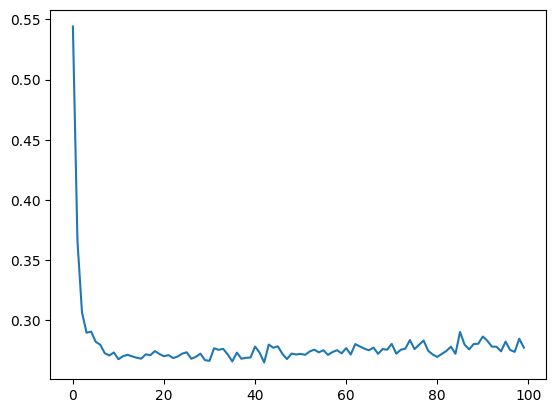

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

In [22]:
# it is up-down happens in case of "Stochastic_GD" before converging to its final point.

In [18]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - accuracy: 0.2875 - loss: 0.7630 - val_accuracy: 0.5000 - val_loss: 0.6864
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.3313 - loss: 0.7364 - val_accuracy: 0.5125 - val_loss: 0.6842
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.3500 - loss: 0.7188 - val_accuracy: 0.5375 - val_loss: 0.6829
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3844 - loss: 0.7058 - val_accuracy: 0.5875 - val_loss: 0.6814
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4656 - loss: 0.6946 - val_accuracy: 0.6375 - val_loss: 0.6806
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5656 - loss: 0.6838 - val_accuracy: 0.6500 - val_loss: 0.6795
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6844 - loss: 0.6738 - val_accuracy: 0.6625 - val_loss: 0.6791
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.7469 - loss: 0.6644 - val_accuracy: 0.6875 - val_loss: 0.67

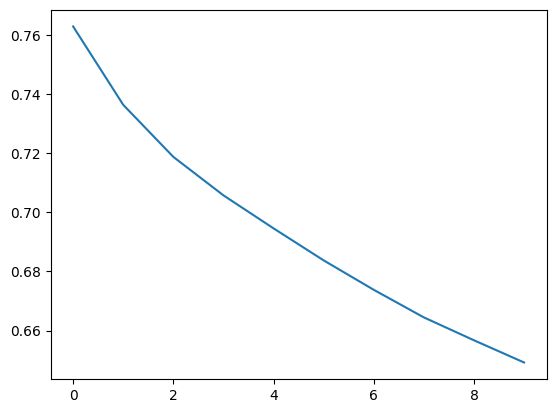

In [20]:
plt.plot(history.history['loss'])

In [21]:
# there is no any zig-zag motion in "Batch_GD" before converging to its final point.